In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pandas as pd
import csv
sns.set_theme(style="whitegrid")
sns.set_context(context="paper")

# Methods comparison

In [2]:
vicar_data = np.array([[0.726,0.070,0.666,0.461,0.021,-0.003],
                      [-0.012,-0.112,0.041,-0.035,-0.008,0.000],
                      [0.267,0.024,-0.052,-0.055,0.053,-0.083],
                      [0.276,0.025,0.297,0.298,0.125,0.076]])
vipl_data = np.array([[0.576,0.018,0.574,0.214,0.006,-0.025],
                     [0.032,0.002,0.064,0.092,-0.004,0.031],
                     [-0.024,-0.029,0.097,0.056,0.019,0.049],
                     [0.495,-0.017,0.466,0.392,0.078,0.053]])
vicar_std = np.array([[0.220,0.101,0.441,0.396,0.202,0.099],
                     [0.286,0.146,0.176,0.092,0.142,0.111],
                     [0.302,0.157,0.265,0.173,0.307,0.107],
                     [0.219,0.000,0.336,0.324,0.260,0.105]])
vipl_std = np.array([[0.048,0.021,0.064,0.222,0.070,0.070],
                    [0.059,0.034,0.115,0.186,0.044,0.039],
                    [0.048,0.057,0.050,0.074,0.057,0.031],
                    [0.062,0.000,0.049,0.075,0.172,0.072]])

dataset = "vicar"

if dataset == "vipl":
    data = vipl_data
    std = vipl_std
    title = "VIPL-HR"
else:
    data = vicar_data
    std = vicar_std
    title = "In-House-rPPG-set"

data_df = pd.DataFrame(data, columns=["1D CNN", "1D TF", "CWT CNN", "CWT TF", "STM CNN", "STM TF"])
data_df['Feature'] = ["HR", "RT", "PWA", "AUP"]
std_df = pd.DataFrame(std, columns=["1D CNN", "1D TF", "CWT CNN", "CWT TF", "STM CNN", "STM TF"])
#std_df['Feature'] = ["HR", "RT", "PWA", "AUP"]

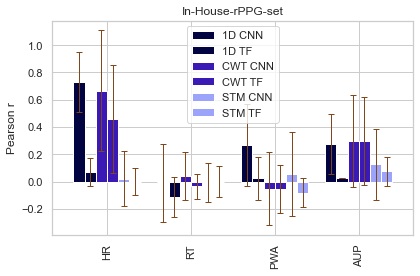

In [3]:
sns.set_theme(style="whitegrid")
# my_colors = ['#020442', '#020442', '#3b19b5', '#3b19b5', '#c4bdde', '#c4bdde', '#e05c58']
my_colors = ['#020442', '#020442', '#3b19b5', '#3b19b5', '#9ba3fa', '#9ba3fa']
#data_df.plot(x="Feature", y=["1D CNN", "1D TF", "CWT CNN", "CWT TF", "STM CNN", "STM TF"], kind='bar', 
#             width=0.8, color=my_colors, legend=None, yerr=std_df)

fig, ax = plt.subplots()
#data_df.plot.bar(width=0.8, yerr=std_df, ax=ax, color=my_colors, ecolor='gray', error_kw=dict(lw=3, capsize=4, capthick=3))
data_df.plot.bar(width=0.8, yerr=std_df, ax=ax, color=my_colors, ecolor='#80471c', error_kw=dict(lw=1, capsize=3, capthick=1))

#ax.get_legend().remove()
plt.ylabel("Pearson r")
plt.title(title)
ax.set_xticklabels(["HR", "RT", "PWA", "AUP"])

fig.tight_layout()
plt.show()

# MAPE graph

In [4]:
dataset = "vicar"

sns.set_theme()
path = f"C:\\Users\\ruben\\Documents\\thesis\\data\\true_vs_est_2\\"
true_files = glob.glob(path+f"{dataset}*tru*.csv")  
est_files = glob.glob(path+f"{dataset}*est*.csv") 
print(len(true_files))

def mape(true, est):
    errors = []
    for i in range(len(true)):
        errors.append(abs((true[i]-est[i])/true[i]))
    return sum(errors)/len(errors)

166


[0.02103530908733328, 0.03879265574876837, 0.2023970730991939, 0.02492448389891281]


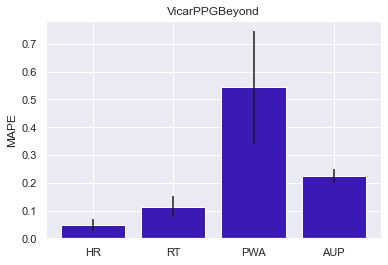

In [5]:
models = []
features = []
mapes = []
stds = []

apes = []
for i in range(len(true_files)-1):
    fname = true_files[i].split("\\")[-1]
    next_fname = true_files[i+1].split("\\")[-1]

    est_data = np.loadtxt(est_files[i], delimiter=',')
    true_data = np.loadtxt(true_files[i], delimiter=',')
    
    if true_files[i].split("\\")[-1][:-10] != est_files[i].split("\\")[-1][:-10]:
        print(fname)
        print(est_files[i].split("\\")[-1][-10])
    
    apes.append(mape(true_data, est_data))
    
    model = " ".join(fname.split("_")[1:3])
    feature = fname.split("_")[3]
    if feature != next_fname.split("_")[3]:
        mapes.append(sum(apes)/len(apes))
        stds.append(np.std(np.array(apes)))
        apes = []
        models.append(model)
        features.append(feature)
mapes.append(sum(apes)/len(apes))
stds.append(np.std(np.array(apes)))
models.append(model)
features.append(feature)

data_array = np.array([features, models, mapes, stds])
data = data_array[:, data_array[0].argsort()]

new_data = []
for i in range(int(len(data[0])/6)):
    lowest_mape_arg = np.argmin(data[2,i*6:i*6+6])
    new_data.append(list(data[:, i*6+lowest_mape_arg]))

y_labels = ["HR", "RT", "PWA", "AUP"]
y_values = [float(new_data[1][2]), float(new_data[3][2]), float(new_data[2][2]), float(new_data[0][2])]
y_errors = [float(new_data[1][3]), float(new_data[3][3]), float(new_data[2][3]), float(new_data[0][3])]

print(y_errors)
fig, ax = plt.subplots()
ax.bar(np.arange(4), y_values, yerr=y_errors, color='#3b19b5')
#ax.set_yscale('log')
ax.set_xticks(np.arange(4))
ax.set_xticklabels(y_labels)
ax.set_ylabel("MAPE")
if dataset == "vipl":
    ax.set_title("VIPL-HR")
else:
    ax.set_title("VicarPPGBeyond")
plt.show()
    
#data = pd.DataFrame(list(zip(models,features,mapes)), columns=["Model", "Feature", "MAPE"])
# data2 = data.groupby("Feature")["MAPE"].min()
#data = data.sort_values(["Feature", "MAPE"])

#print(stds)

#data.to_csv(f"C:\\Users\\ruben\\Documents\\thesis\\data\\mapes_{dataset}.csv")

# True vs estimated graphs

In [6]:
dataset = "vipl"

sns.set_theme(style="whitegrid")
path = f"C:\\Users\\ruben\\Documents\\thesis\\data\\true_vs_est_gt_2\\"
true_files = glob.glob(path+f"{dataset}*tru*.csv")
est_files = glob.glob(path+f"{dataset}*est*.csv")
print(len(true_files))

#for i in range(16):
#    est_data = np.loadtxt(files[i*2], delimiter=',')
#    true_data = np.loadtxt(files[i*2+1], delimiter=',')
    
    #print(mape(true_data, est_data))

16


C:\Users\ruben\Anaconda3\envs\testRhythm\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\ruben\Anaconda3\envs\testRhythm\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


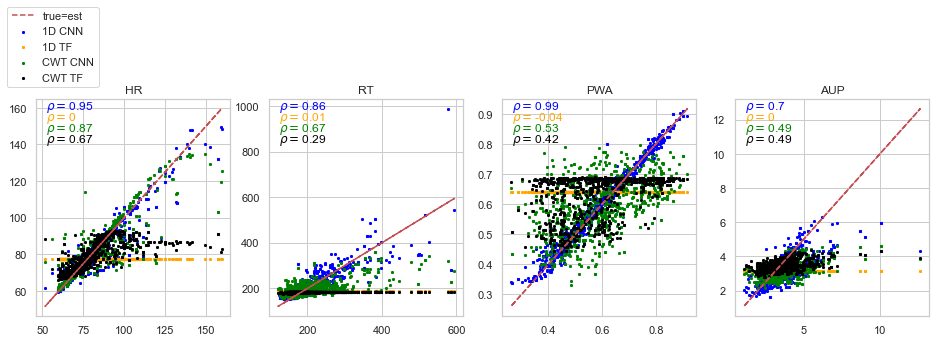

In [7]:
fig, axes = plt.subplots(1,4,figsize=(16,4))
x_titles = ["HR", "RT", "PWA", "AUP"]
y_titles = ["1D CNN", "1D TF", "CWT CNN", "CWT TF"]
colors = ['blue', 'orange', 'green', 'black']
for i in range(16):
    #est_data = np.loadtxt(files[i*2], delimiter=',')
    #true_data = np.loadtxt(files[i*2+1], delimiter=',')
    est_data = np.loadtxt(est_files[i], delimiter=',')
    true_data = np.loadtxt(true_files[i], delimiter=',')
    
    #print(mape(true_data, est_data))
    pearson = np.corrcoef(true_data, est_data)[0,1]
    if np.isnan(pearson):
        pearson = 0
        
    if i%4 == 0:
        y_pos = 3
    elif i%4 == 1:
        y_pos = 0
    elif i%4 == 2:
        y_pos = 2
    elif i%4 == 3:
        y_pos = 1
        
    if int(i/4) == 0:
        axes[y_pos].plot(true_data, true_data, 'r', markersize=3, linestyle='dashed', label='true=est')
        axes[y_pos].set_title(x_titles[y_pos])
    
    axes[y_pos].scatter(x=true_data, y=est_data, c=colors[int(i/4)], marker='x', s=5, label=y_titles[int(i/4)])
    
    if dataset == 'vicar' and y_pos == 2:
        text_positions = (0.75, 0.2 - int(i/4)*0.05)
    else:
        # text_positions = (xlim[0] + 0.05*(xlim[1] - xlim[0]), ylim[1] - 0.05*(ylim[1] - ylim[0]) - int(i/4)*0.05*(ylim[1] - ylim[0]))
        text_positions = (0.05, 0.95 - int(i/4)*0.05)
    
    axes[y_pos].annotate(r'$\rho=$'+str(round(pearson, 2)), xy=text_positions, c=colors[int(i/4)], xycoords='axes fraction')

axes[0].legend(bbox_to_anchor=(0.35, 1.45))

C:\Users\ruben\Anaconda3\envs\testRhythm\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\ruben\Anaconda3\envs\testRhythm\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\ruben\Anaconda3\envs\testRhythm\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\ruben\Anaconda3\envs\testRhythm\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


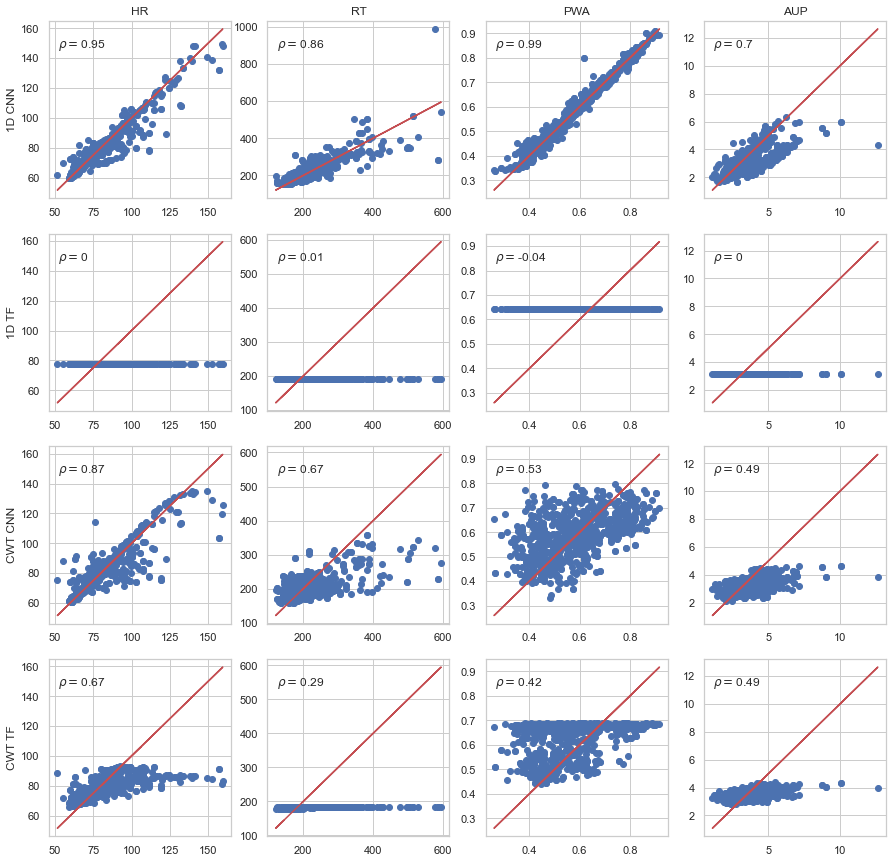

In [8]:
fig, axes = plt.subplots(4,4,figsize=(15,15))
x_titles = ["HR", "RT", "PWA", "AUP"]
y_titles = ["1D CNN", "1D TF", "CWT CNN", "CWT TF"]
for i in range(16):
    #est_data = np.loadtxt(files[i*2], delimiter=',')
    #true_data = np.loadtxt(files[i*2+1], delimiter=',')
    est_data = np.loadtxt(est_files[i], delimiter=',')
    true_data = np.loadtxt(true_files[i], delimiter=',')
    
    #print(mape(true_data, est_data))
    pearson = np.corrcoef(true_data, est_data)[0,1]
    if np.isnan(pearson):
        pearson = 0
        
    if i%4 == 0:
        y_pos = 3
    elif i%4 == 1:
        y_pos = 0
        axes[int(i/4),y_pos].set_ylabel(y_titles[int(i/4)])
    elif i%4 == 2:
        y_pos = 2
    elif i%4 == 3:
        y_pos = 1
    
    axes[int(i/4),y_pos].scatter(x=true_data, y=est_data)
    axes[int(i/4),y_pos].plot(true_data, true_data, 'r')
    #diff_true = max(true_data) - min(true_data)
    #diff_est = max(est_data) - min(est_data)
    #text_positions = (min(min(true_data), min(est_data)), max(max(true_data), max(est_data))) 
    #text_positions = (text_positions[0] + 0.05*diff_true, text_positions[1] - 0.1*diff_est)
    xlim = axes[int(i/4),y_pos].get_xlim()
    ylim = axes[int(i/4),y_pos].get_ylim()
    
    if int(i/4) == 0:
        axes[int(i/4),y_pos].set_title(x_titles[y_pos])

    text_positions = (xlim[0] + 0.05*(xlim[1] - xlim[0]), ylim[1] - 0.15*(ylim[1] - ylim[0]))
    axes[int(i/4),y_pos].annotate(r'$\rho=$'+str(round(pearson, 2)), xy=text_positions)
    

# Data distributions

Median: 78.23
IQR: 15.4
Median: 189.74
IQR: 51.19
Median: 0.62
IQR: 0.22
Median: 3.45
IQR: 1.33
Median: 68.07
IQR: 13.44
Median: 144.33
IQR: 44.58
Median: 0.17
IQR: 0.24
Median: 8.7
IQR: 3.57


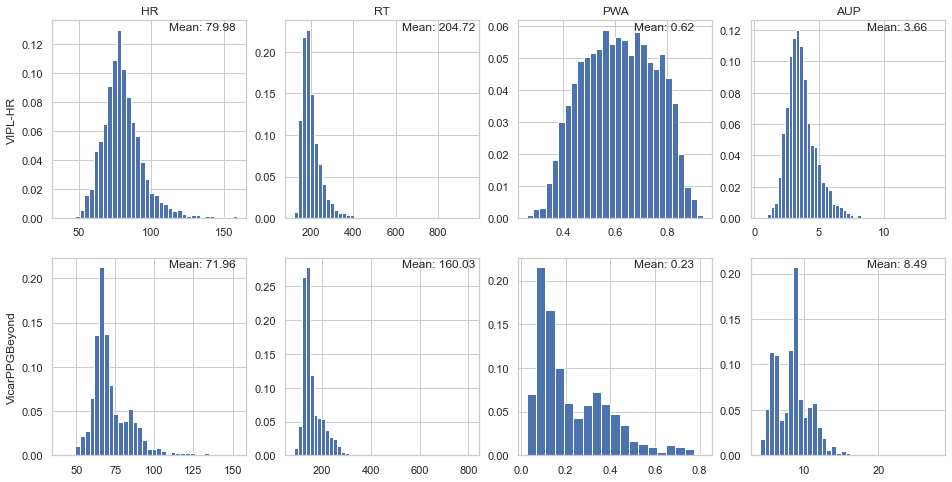

In [9]:
from scipy import stats

file_path = f"C:\\Users\\ruben\\Documents\\thesis\\src\\"
data_vicar = np.loadtxt(file_path+"vicar_statistics.csv", delimiter=',')
data_vipl = np.loadtxt(file_path+"vipl_statistics.csv", delimiter=',')

x_titles = ["HR", "RT", "PWA", "AUP"]
fig, axes = plt.subplots(2,4,figsize=(16, 8))
for j, data in enumerate([data_vipl, data_vicar]):
    for i, feature in enumerate(x_titles):
        q25, q75 = np.percentile(data[i], [25, 75])
        bin_width = 2 * (q75 - q25) * len(data[i]) ** (-1 / 3)
        bin_width = max(bin_width, data[i].max()/50)
        bins = round((data[i].max() - data[i].min()) / bin_width)
        weights = np.ones_like(data[i]) / len(data[i])
        axes[j, i].hist(data[i], bins=bins, weights=weights)

        xlim = axes[j, i].get_xlim()
        ylim = axes[j, i].get_ylim()
        
        print(f"Median: {round(np.median(data[i]), 2)}")
        print(f"IQR: {round(stats.iqr(data[i]), 2)}")

        text_positions = (xlim[1] - 0.40 * (xlim[1] - xlim[0]), ylim[1] - 0.05 * (ylim[1] - ylim[0]))
        axes[j, i].annotate(f"Mean: {round(np.mean(data[i]), 2)}", xy=text_positions)
        if j == 0:
            axes[j, i].set_title(x_titles[i])
        if i == 0:
            if j == 0:
                axes[j, i].set_ylabel("VIPL-HR")
            else:
                axes[j, i].set_ylabel("VicarPPGBeyond")

Median: 68.07
IQR: 13.44
Median: 144.33
IQR: 44.58
Median: 0.17
IQR: 0.24
Median: 8.7
IQR: 3.57
Median: 78.23
IQR: 15.4
Median: 189.74
IQR: 51.19
Median: 0.62
IQR: 0.22
Median: 3.45
IQR: 1.33


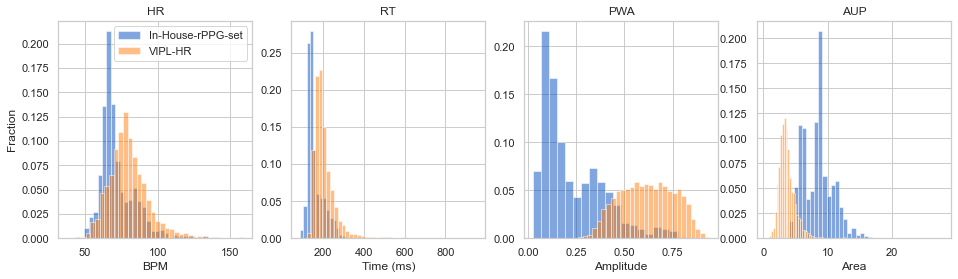

In [10]:
from scipy import stats

file_path = f"C:\\Users\\ruben\\Documents\\thesis\\src\\"
datasets = ['In-House-rPPG-set', 'VIPL-HR']

data_vicar = np.loadtxt(file_path+"vicar_statistics.csv", delimiter=',')
data_vipl = np.loadtxt(file_path+"vipl_statistics.csv", delimiter=',')
colors = ['#044cbf', (1.0, 0.4980392156862745, 0.054901960784313725)]

x_titles = ["HR", "RT", "PWA", "AUP"]
fig, axes = plt.subplots(1,4,figsize=(16, 4))
for j, data in enumerate([data_vicar, data_vipl]):
    for i, feature in enumerate(x_titles):
        q25, q75 = np.percentile(data[i], [25, 75])
        bin_width = 2 * (q75 - q25) * len(data[i]) ** (-1 / 3)
        bin_width = max(bin_width, data[i].max()/50)
        bins = round((data[i].max() - data[i].min()) / bin_width)
        #bins = min(bins, 20)
        weights = np.ones_like(data[i]) / len(data[i])
        dist = axes[i].hist(data[i], alpha=0.5, bins=bins, weights=weights, color=colors[j], label=datasets[j])
        
        if i == 0:
            axes[i].set_ylabel("Fraction")
            axes[i].legend()
            axes[i].set_xlabel("BPM")
        elif i == 1:
            axes[i].set_xlabel("Time (ms)")
        elif i == 2:
            axes[i].set_xlabel("Amplitude")
        elif i == 3:
            axes[i].set_xlabel("Area")
            #axes[i].set_xlim((0, 5))
        
        print(f"Median: {round(np.median(data[i]), 2)}")
        print(f"IQR: {round(stats.iqr(data[i]), 2)}")

        #text_positions = (0.6, 0.95 - 0.05 * j)
        #axes[i].annotate(f"Mean: {round(np.mean(data[i]), 2)}", xy=text_positions, xycoords='axes fraction', color=colors[j])
        if j == 0:
            axes[i].set_title(x_titles[i])

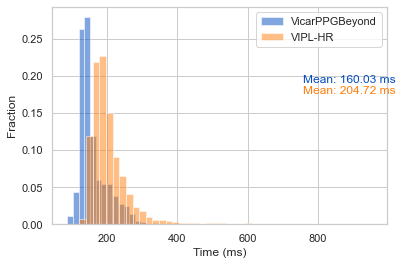

In [12]:
from scipy import stats

file_path = f"C:\\Users\\ruben\\Documents\\thesis\\src\\"
datasets = ['VicarPPGBeyond', 'VIPL-HR']

data_vicar = np.loadtxt(file_path+"vicar_statistics.csv", delimiter=',')
data_vipl = np.loadtxt(file_path+"vipl_statistics.csv", delimiter=',')
colors = ['#044cbf', (1.0, 0.4980392156862745, 0.054901960784313725)]

for j, data in enumerate([data_vicar, data_vipl]):
    q25, q75 = np.percentile(data[1], [25, 75])
    bin_width = 2 * (q75 - q25) * len(data[1]) ** (-1 / 3)
    bin_width = max(bin_width, data[1].max()/50)
    bins = round((data[1].max() - data[1].min()) / bin_width)
    #bins = min(bins, 20)
    weights = np.ones_like(data[1]) / len(data[1])
    dist = plt.hist(data[1], alpha=0.5, bins=bins, weights=weights, color=colors[j], label=datasets[j])

    plt.xlabel("Time (ms)")
    plt.ylabel("Fraction")
    plt.legend()
    
    text_positions = (0.75, 0.65 - 0.05 * j)
    plt.annotate(f"Mean: {round(np.mean(data[1]), 2)} ms", xy=text_positions, xycoords='axes fraction', color=colors[j])